Read prediction results and experimental effectors.

In [1]:
import pandas as pd

def read_effector_info(accession, effector_type):

    blast_results = pd.read_table(f'data/{accession}/blastp.txt', header=None)
    exp_effector = blast_results[(blast_results.iloc[:, 2] == 100) & (
        blast_results.iloc[:, 4] == 0) & (blast_results.iloc[:, 5] == 0)]
    exp_names = list(exp_effector.iloc[:, 0].apply(
        lambda x: '_'.join(x.split('_')[-3:-1])).unique())

    effectors = pd.read_csv(f'data/{accession}/effectors.csv')

    effector_list = effectors[effectors['system'] == effector_type]
    effector_names = effector_list['name'].apply(lambda x: x.split('-')[1])
    interaction_list = set(exp_names).intersection(set(effector_names))
    recalls = [len(interaction_list) / len(exp_names)]
    nums = [len(effector_names)]
    intersections = [len(interaction_list)]

    for threshold in [0.5, 0.6, 0.7, 0.8, 0.9]:
        effector_list_ = effectors[(effectors['system'] == effector_type) & (effectors['score'] >= threshold)]
        effector_names_ = effector_list_['name'].apply(lambda x: x.split('-')[1])
        interaction_list_ = set(exp_names).intersection(set(effector_names_))
        recalls.append(len(interaction_list_) / len(exp_names))
        nums.append(len(effector_names_))
        intersections.append(len(interaction_list_)) 

    df = pd.DataFrame({'Threshold': ['None', '0.5', '0.6', '0.7', '0.8', '0.9'],
                       'Recall': recalls, 'Pred. Num.': nums, 'Intersection': intersections, 'Accession': accession})
    
    return df
    

In [2]:
df1 = read_effector_info('NC_003197.2', 'III')
df2 = read_effector_info('NC_004578.1', 'III')
df3 = read_effector_info('NC_002942.5', 'IV')
df4 = read_effector_info('NC_002506.1', 'VI')
df5 = read_effector_info('NC_002516.2', 'VI')

df = pd.concat([df1, df2, df3, df4, df5], axis = 0)

Plot the recalls under different thresholds.

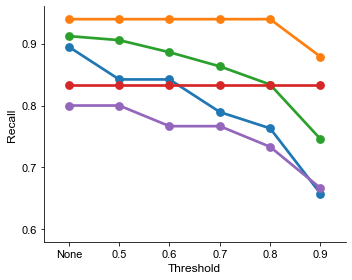

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11

fig, ax = plt.subplots(figsize=(5, 4))
sns.pointplot(
    data=df, x="Threshold", y="Recall", hue="Accession"
)
sns.despine()
ax.set_ylim([0.58, 0.96])
ax.set_yticks([0.6, 0.7, 0.8, 0.9])
ax.legend([], [], frameon=False)
plt.tight_layout()


Plot recalls and predicted numbers of T4SEs in *Legionella pneumophila* subsp. *pneumophila* str. Philadelphia 1 [NC_002942.5]

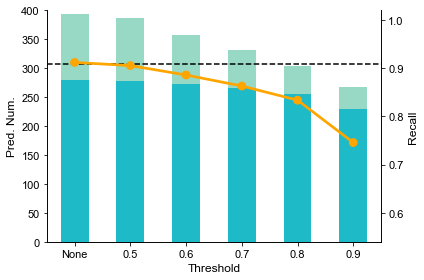

In [4]:
f, ax1 = plt.subplots(figsize=(6, 4))

ax1.set_ylabel('Pred. Num.')
ax1.set_xlabel('Threshold')
ax1.bar(df3['Threshold'], df3['Pred. Num.'], width=0.5, alpha=0.8, color="#7dd0b6")
ax1.bar(df3['Threshold'], df3['Intersection'],
        width=0.5, alpha=0.8, color="#00b3ca")
ax1.set_ylim([0, 400])

ax1.axhline(y=307, linestyle='--', color='k')

ax2 = ax1.twinx()
ax2.set_ylabel('Recall')
ax2.set_ylim([0.54, 1.02])
sns.pointplot(data=df3, x="Threshold", y="Recall", color='orange', ax=ax2)

sns.despine(right=False)
plt.tight_layout()
plt.savefig('pdf/Lp-T4SE-plot.pdf')


Plot recalls and predicted numbers of T6SEs in *Pseudomonas aeruginosa* PAO1 [NC_002516.2]

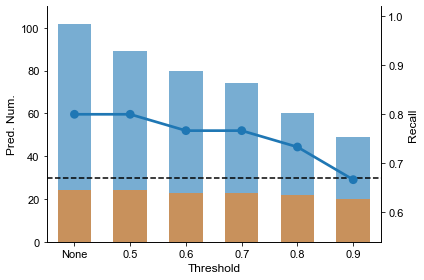

In [5]:
f, ax1 = plt.subplots(figsize=(6, 4))

ax1.set_ylabel('Pred. Num.')
ax1.set_xlabel('Threshold')
ax1.bar(df5['Threshold'], df5['Pred. Num.'], width=0.6, alpha=0.6)
ax1.bar(df5['Threshold'], df5['Intersection'], width=0.6, alpha=0.6)
ax1.set_ylim([0, 110])

ax1.axhline(y=30, linestyle='--', color='k')

ax2 = ax1.twinx()
ax2.set_ylabel('Recall')
ax2.set_ylim([0.54, 1.02])
sns.pointplot(data=df5, x="Threshold", y="Recall", ax=ax2)

sns.despine(right=False)
plt.tight_layout()
plt.savefig('pdf/Pa-T6SE-plot.pdf')

Plot recalls and predicted numbers of T6SEs in *Vibrio cholerae* O1 biovar El Tor str. N16961 [NC_002506.1]

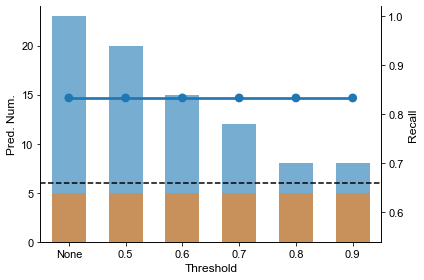

In [6]:
f, ax1 = plt.subplots(figsize=(6, 4))

ax1.set_ylabel('Pred. Num.')
ax1.set_xlabel('Threshold')
ax1.bar(df4['Threshold'], df4['Pred. Num.'], width=0.6, alpha=0.6)
ax1.bar(df4['Threshold'], df4['Intersection'], width=0.6, alpha=0.6)
ax1.set_ylim([0, 24])

ax1.axhline(y=6, linestyle='--', color='k')

ax2 = ax1.twinx()
ax2.set_ylabel('Recall')
ax2.set_ylim([0.54, 1.02])
sns.pointplot(data=df4, x="Threshold", y="Recall", ax=ax2)

sns.despine(right=False)
plt.tight_layout()
plt.savefig('pdf/Vc-T6SE-plot.pdf')

Plot recalls and predicted numbers of T3SEs in *Salmonella enterica* subsp. *enterica* serovar Typhimurium str. LT2 [NC_003197.2]

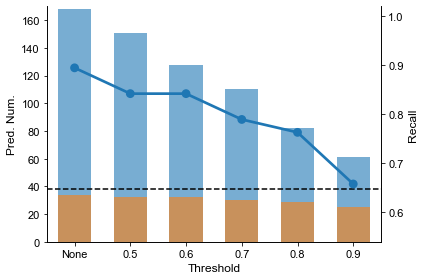

In [7]:
f, ax1 = plt.subplots(figsize=(6, 4))

ax1.set_ylabel('Pred. Num.')
ax1.set_xlabel('Threshold')
ax1.bar(df1['Threshold'], df1['Pred. Num.'], width=0.6, alpha=0.6)
ax1.bar(df1['Threshold'], df1['Intersection'], width=0.6, alpha=0.6)
ax1.set_ylim([0, 170])

ax1.axhline(y=38, linestyle='--', color='k')

ax2 = ax1.twinx()
ax2.set_ylabel('Recall')
ax2.set_ylim([0.54, 1.02])
sns.pointplot(data=df1, x="Threshold", y="Recall", ax=ax2)

sns.despine(right=False)
plt.tight_layout()
plt.savefig('pdf/Se-T3SE-plot.pdf')


Plot recalls and predicted numbers of T3SEs in *Pseudomonas syringae* pv. tomato str. DC3000 [NC_004578.1]

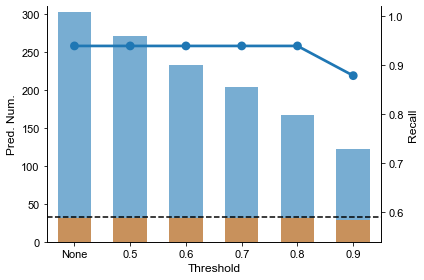

In [8]:
f, ax1 = plt.subplots(figsize=(6, 4))

ax1.set_ylabel('Pred. Num.')
ax1.set_xlabel('Threshold')
ax1.bar(df2['Threshold'], df2['Pred. Num.'], width=0.6, alpha=0.6)
ax1.bar(df2['Threshold'], df2['Intersection'], width=0.6, alpha=0.6)
ax1.set_ylim([0, 310])

ax1.axhline(y=33, linestyle='--', color='k')

ax2 = ax1.twinx()
ax2.set_ylabel('Recall')
ax2.set_ylim([0.54, 1.02])
sns.pointplot(data=df2, x="Threshold", y="Recall", ax=ax2)

sns.despine(right=False)
plt.tight_layout()
plt.savefig('pdf/Ps-T3SE-plot.pdf')


Read information about novel effector candidates.

In [9]:
data = pd.read_csv('data/novel_effectors.csv')
data['type'] = data['name'].apply(lambda x: x.split('-')[0])
# data['-logE'] = data['evalue'].apply(lambda x: min(10, -np.log10(x)))

Lp = data[data['accession'] == 'NC_002942.5']
Lp


,name,score,identity,evalue,accession,type
96,T4SE-WP_010945795.1,0.9945,29.000,0.640,NC_002942.5,T4SE
97,T4SE-WP_010945796.1,0.9431,42.105,0.120,NC_002942.5,T4SE
98,T4SE-WP_015444957.1,0.5727,26.923,2.000,NC_002942.5,T4SE
99,T4SE-WP_015444956.1,0.9693,33.333,0.320,NC_002942.5,T4SE
100,T4SE-WP_010945848.1,0.7019,45.455,3.100,NC_002942.5,T4SE
...,...,...,...,...,...,...
205,T4SE-WP_014842884.1,0.5105,31.579,1.300,NC_002942.5,T4SE
206,T4SE-WP_014327021.1,0.5987,27.273,2.300,NC_002942.5,T4SE
207,T4SE-WP_010948637.1,0.9383,26.190,1.200,NC_002942.5,T4SE
208,T4SE-WP_010948660.1,0.9832,34.615,0.004,NC_002942.5,T4SE


Plot the distribution of predicted score and identity against known effectors.

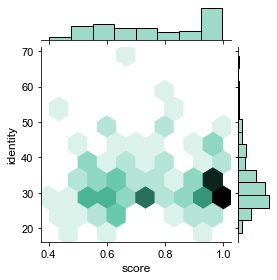

In [10]:
sns.jointplot(data=Lp, x="score", y='identity',
              kind="hex", height=4, color='#7dd0b6')

plt.savefig("pdf/Lp-novel-T4SE-plot.pdf")


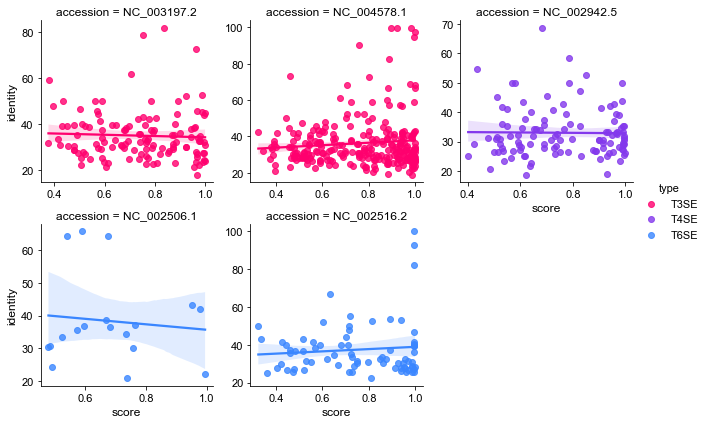

In [11]:
color_dict = {'T3SE': '#ff006e', 'T4SE': '#8338ec', 'T6SE': '#3a86ff'}
sns.lmplot(data=data, x="score", y='identity', hue='type', hue_order=['T3SE', 'T4SE', 'T6SE'], 
           col="accession", col_order=['NC_003197.2', 'NC_004578.1', 'NC_002942.5', 'NC_002506.1', 'NC_002516.2'],
           palette=sns.color_palette(color_dict.values()),
           height=3, col_wrap=3, facet_kws=dict(sharex=False, sharey=False))

sns.despine()

plt.savefig('pdf/novel-effector-plot.pdf')